In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [2]:
def calculate_bmi(height, weight):
    height /= 100
    bmi = weight/np.square(height)
    return round(bmi,2)

In [3]:
def get_min_max(col_name, df):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    q_min = q1-(1.5*iqr)
    q_max = q3+(1.5*iqr)

    return q_min,q1,q3,q_max    


In [ ]:
Severely Underweight,Underweight, Healthy, Overweight, Severely Overweight
2,4,3,1,0

In [30]:
food_df = pd.read_csv('breakfast.csv')
food_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     42 non-null     int64  
 1   Food_items     42 non-null     object 
 2   Calories       42 non-null     int64  
 3   Fats           42 non-null     float64
 4   Proteins       42 non-null     float64
 5   Iron           42 non-null     float64
 6   Calcium        42 non-null     float64
 7   Sodium         42 non-null     int64  
 8   Potassium      42 non-null     float64
 9   Carbohydrates  42 non-null     float64
 10  Fibre          42 non-null     float64
 11  VitaminD       42 non-null     int64  
 12  Sugars         42 non-null     float64
 13  label          42 non-null     int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 4.7+ KB


In [80]:
# Load the food dataset
food_data = pd.read_csv('breakfast.csv')


# Split the data into features (nutritional values) and target variable (food category)
X = food_data.drop('Food_items', axis=1)
X = food_data.iloc[:, 2:13]
y = food_data['label']
foo = food_data.copy()

In [92]:
foo =  food_data.iloc[:, 2:]
# foo

In [96]:
# Severely Underweight,Underweight, Healthy, Overweight, Severely Overweight
# 2,4,3,1,0
# Replace values of columns by using DataFrame.loc[] property.
foo.loc[foo['label'] ==0,'label'] = 's_overweight'
foo.loc[foo['label'] ==1,'label'] = 'overweight'
foo.loc[foo['label'] ==3, 'label'] = 'healthy'
foo.loc[foo['label'] ==4, 'label'] = 'underweight'
foo.loc[foo['label'] ==2, 'label'] = 's_underweight'
  

In [98]:
y= foo['label']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [125]:
# Create a random forest classifier with 100 trees and train it on the entire dataset
tree_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
tree_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [101]:
# Make predictions for the test set
y_pred_test = tree_classifier.predict(X_test)

In [102]:
# test data
test_data = pd.read_csv('food_new.csv')
test_data = test_data.iloc[:, 1:]

In [103]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[3, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 3]])

In [109]:
pd.Series(y_pred).value_counts()

overweight       26
underweight       8
healthy           5
s_underweight     2
s_overweight      1
dtype: int64

In [104]:
y_pred = tree_classifier.predict(X)
confusion_matrix(y, y_pred)

array([[ 5,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  8]])

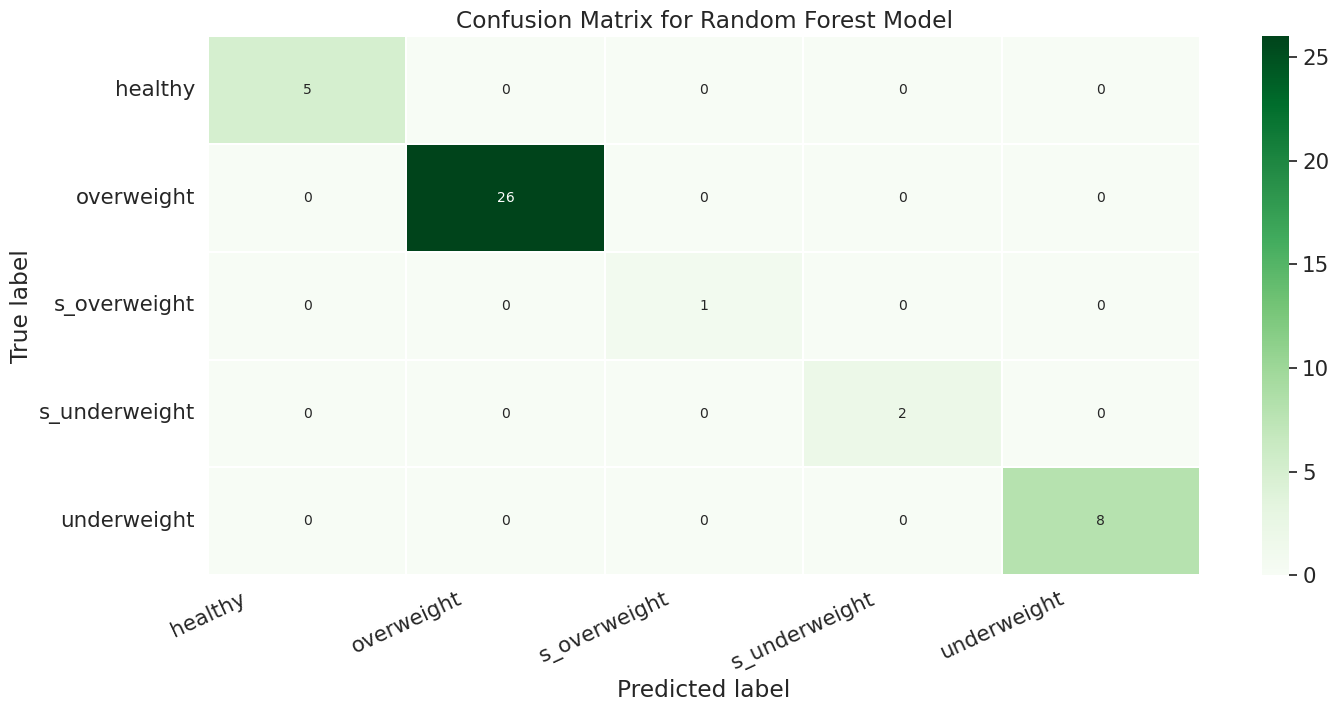

In [123]:
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(y, y_pred)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['healthy', 'overweight', 's_overweight', 's_underweight', 'underweight']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [32]:
#bmi < 18.5 underweight -> 0
#bmi between 18.5 and 24.9 normal weight ->1
#bmi > 25 overweight / obese ->2

#Underweight high proteins,carbohydrates, calories
#overweight low calories,fats high proteins,fibre
#normal balanced amount of nutrients


In [124]:
print(classification_report(y, y_pred))

               precision    recall  f1-score   support

      healthy       1.00      1.00      1.00         5
   overweight       1.00      1.00      1.00        26
 s_overweight       1.00      1.00      1.00         1
s_underweight       1.00      1.00      1.00         2
  underweight       1.00      1.00      1.00         8

     accuracy                           1.00        42
    macro avg       1.00      1.00      1.00        42
 weighted avg       1.00      1.00      1.00        42



In [7]:
user_input = pd.DataFrame({
    'nutrient': ['Calories','Proteins', 'Carbohydrates', 'Sugars', 'Fibre', 'Fats','VitaminD', 'Calcium', 'Iron', 'Sodium', 'Potassium'],
    'min_value': [61, 0.14, 14.08, 4.04, 2.0 ,1.28, 0, 13, 0.28, 0, 104],
    'max_value': [61, 0.14, 14.08, 4.04, 2.0 ,1.28, 0, 13, 0.28, 0, 104]
})

print(user_input)

         nutrient  min_value  max_value
0        Calories      61.00      61.00
1        Proteins       0.14       0.14
2   Carbohydrates      14.08      14.08
3          Sugars       4.04       4.04
4           Fibre       2.00       2.00
5            Fats       1.28       1.28
6        VitaminD       0.00       0.00
7         Calcium      13.00      13.00
8            Iron       0.28       0.28
9          Sodium       0.00       0.00
10      Potassium     104.00     104.00


In [8]:
bmi = calculate_bmi(172,49)
weight = 0
if(bmi<18.5):
    weight = 0
elif(bmi>=18.5 and bmi<=24.9):
    weight = 1
else:
    weight = 2
    
available_cols = ['Calories', 'Proteins', 'Carbohydrates', 'Fibre']  #0 1 2 4
if(weight == 0):
    for i, col in enumerate(available_cols):
        q_min,q1,q3,q_max = get_min_max(col, food_data)
        if(i == 3):
            user_input['min_value'][i+1] = q3
            user_input['max_value'][i+1] = q_max
        else:
            user_input['min_value'][i] = q3
            user_input['max_value'][i] = q_max
elif(weight == 1):
    for i, col in enumerate(available_cols):
        q_min,q1,q3,q_max = get_min_max(col, food_data)
        if(i == 3):
            user_input['min_value'][i+1] = q1
            user_input['max_value'][i+1] = q3
        else:
            user_input['min_value'][i] = q1
            user_input['max_value'][i] = q3
else:
    for i, col in enumerate(available_cols):
        q_min,q1,q3,q_max = get_min_max(col, food_data)
        if(i == 3):
            user_input['min_value'][i+1] = q_min
            user_input['max_value'][i+1] = q1
        else:
            user_input['min_value'][i] = q_min
            user_input['max_value'][i] = q1

    

In [9]:
user_input

,nutrient,min_value,max_value
0,Calories,279.00,609.000
1,Proteins,10.56,24.900
2,Carbohydrates,25.40,56.255
3,Sugars,4.04,4.040
4,Fibre,1.90,4.750
5,Fats,1.28,1.280
6,VitaminD,0.00,0.000
7,Calcium,13.00,13.000
8,Iron,0.28,0.280
9,Sodium,0.00,0.000


In [23]:
#Gives only one food options based on nutrients
#preferences for user
user_preferences = {'Calories': 120,
                    'Proteins': 0.14,
                    'Carbohydrates':124.08,
                    'Sugars': 4.04,
                    'Fibre':2.0,
                    'Fats':1.28,
                    'VitaminD':0,
                    'Calcium':13,
                    'Iron':0.28,
                    'Sodium':0,
                    'Potassium':12}

# Predict the meal category based on the user's preferences
user_input = pd.DataFrame(user_preferences, index=[0])

In [15]:
user_input

,Calories,Proteins,Carbohydrates,Sugars,Fibre,Fats,VitaminD,Calcium,Iron,Sodium,Potassium
0,70,0.14,14.08,4.04,2.0,1.28,0,13,0.28,0,104


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
predicted_category = tree_classifier.predict(user_input)
predicted_category

array(['Sugar substitutes'], dtype=object)

In [10]:
# Get a list of foods in the predicted category
recommended_foods = food_data[food_data['Food_items'] == predicted_category]

# Compute the cosine similarity between the user's preferences and the nutritional values of the recommended foods
similarity_scores = cosine_similarity(user_input, recommended_foods.drop('Food_items', axis=1))

# Get the top 5 recommended foods based on the cosine similarity scores
top_recommendations = recommended_foods.iloc[np.argsort(similarity_scores)[0][-5:], :]['Food_items'].values.tolist()

# Display the recommended foods to the user
print(f"Based on your preferences, we recommend the following {predicted_category} foods:")
for food in top_recommendations:
    print(food)

Based on your preferences, we recommend the following Pineapple foods:
Pineapple


In [108]:
#Gives multiple food options based on nutrients

for i, col in enumerate(available_cols):
    # Filter the food data by the nutrient range values
    if(i==3):
        min_value = user_input['min_value'][i+1]
        max_value = user_input['max_value'][i+1]
    else:
        min_value = user_input['min_value'][i]
        max_value = user_input['max_value'][i]
        
    filtered_data = food_data[(food_data[col] >= min_value) & (food_data[col] <= max_value)]
    if(filtered_data.empty):
        continue
    # Predict the meal category based on the user's preferences
    predicted_category = tree_classifier.predict(filtered_data.drop('Food_items', axis=1))

    # Get a list of foods in the predicted category
    recommended_foods = filtered_data[filtered_data['Food_items'] == predicted_category[0]]
        
    print(f"For {col} range of {min_value} to {max_value}, we recommend {predicted_category[0:5]} foods")
    print('--------------------------------------------------------------------------------')
#     for food in predicted_category:
#         print(food)

For Calories range of 279.0 to 609.0, we recommend ['Flavored milk, whole' 'Not included in a food category'
 'Cream cheese, sour cream, whipped cream' 'Cakes and pies' 'Cheese'] foods
--------------------------------------------------------------------------------
For Proteins range of 10.56 to 24.9, we recommend ['Cheese' 'Cottage/ricotta cheese' 'Pizza' 'Cheese sandwiches'
 'Baby food: meat and dinners'] foods
--------------------------------------------------------------------------------
For Carbohydrates range of 25.4 to 56.254999999999995, we recommend ['Flavored milk, whole' 'Not included in a food category' 'Cakes and pies'
 'Cheese sandwiches' 'Deli and cured meat sandwiches'] foods
--------------------------------------------------------------------------------
For Fibre range of 1.9 to 4.75, we recommend ['Other dark green vegetables' 'Deli and cured meat sandwiches'
 'Bean, pea, legume dishes' 'Vegetable dishes'
 'Vegetable sandwiches/burgers'] foods
----------------------